In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.metrics import silhouette_score
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Mall_Customers (1).csv',index_col='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


### Exploring Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

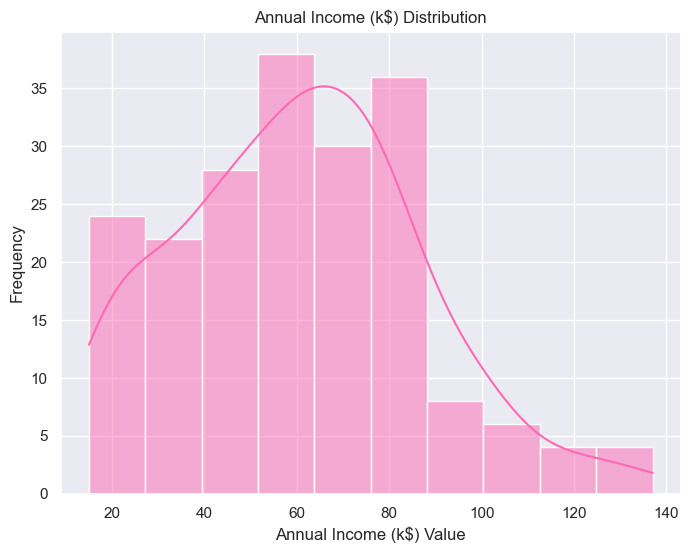

In [6]:
plt.figure(figsize=(8,6))
sns.histplot(df['Annual Income (k$)'],kde=True,color='hotpink')
plt.title('Annual Income (k$) Distribution')
plt.xlabel('Annual Income (k$) Value')
plt.ylabel('Frequency')
plt.show()

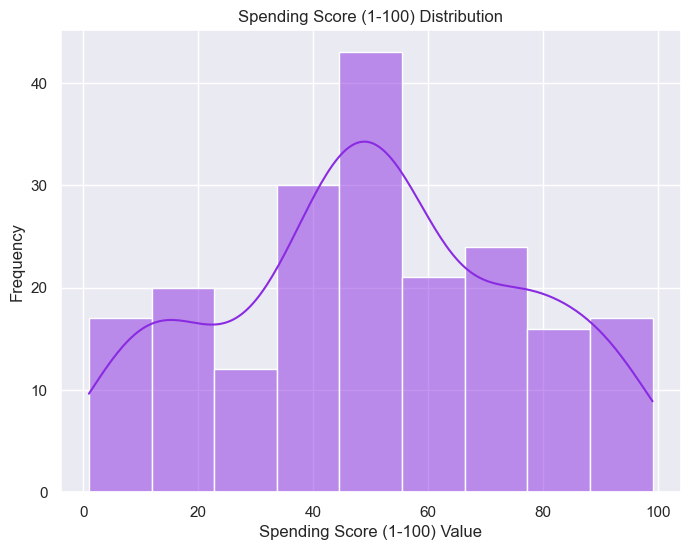

In [7]:
plt.figure(figsize=(8,6))
sns.histplot(df['Spending Score (1-100)'],kde=True,color='blueviolet')
plt.title('Spending Score (1-100) Distribution')
plt.xlabel('Spending Score (1-100) Value')
plt.ylabel('Frequency')
plt.show()

#### Make sure data has no outliers

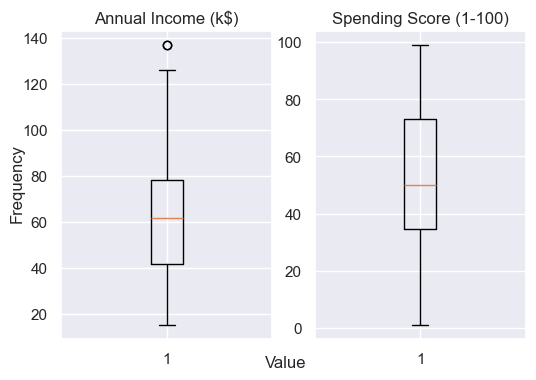

In [9]:
fig,(axes_1 , axes_2) = plt.subplots(1,2,figsize = (6,4))
axes_1.set_title('Annual Income (k$)')
axes_1.boxplot(df['Annual Income (k$)'])

axes_2.set_title('Spending Score (1-100)')
axes_2.boxplot(df['Spending Score (1-100)'])
fig.text(0.5, 0.04, 'Value', ha='center') 

fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
plt.show()

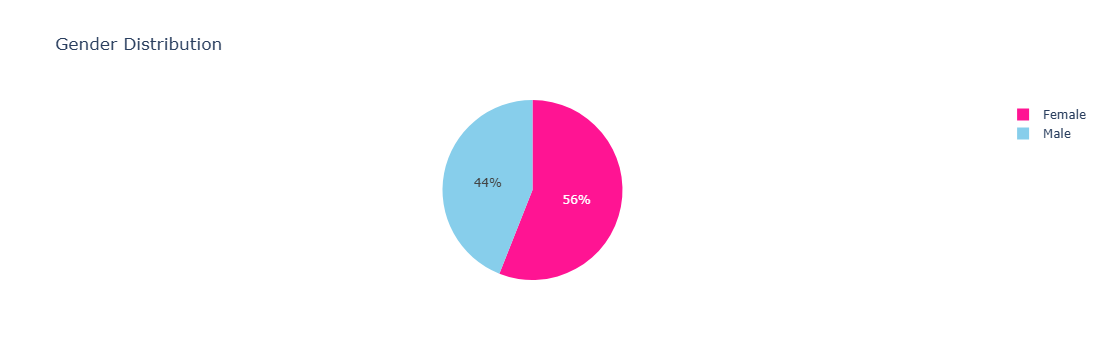

In [10]:
px.pie(df, names='Gender', color='Gender',
             color_discrete_sequence=['skyblue', 'deeppink'],
             title='Gender Distribution') 


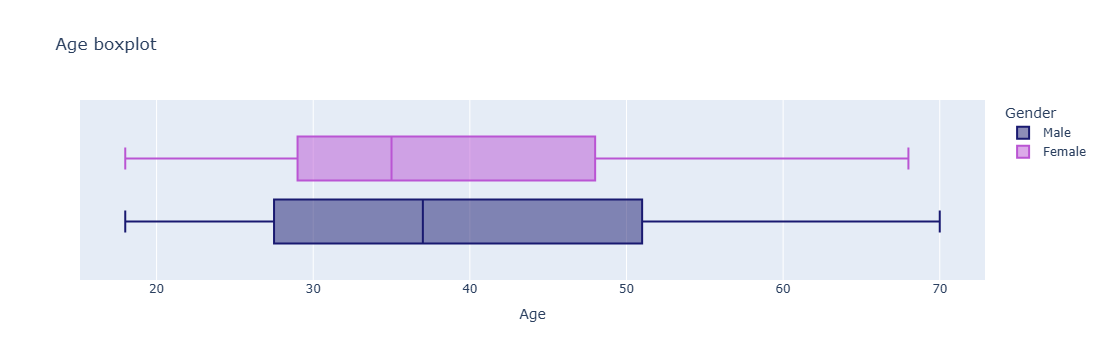

In [11]:
px.box(df,'Age',title = 'Age boxplot',color='Gender',color_discrete_sequence=['midnightblue','mediumorchid'])

<div style="
    background-color: #e0f7fa;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #333;
">
    Results on the Analysis
</div>

### Summary of Data Statistics

#### Age:
- **Minimum Age**:  
  - Males: 18  
  - Females: 18  
- **Maximum Age**:  
  - Males: 70  
  - Females: 68  
- **Average Age**:  
  - Males: 39  
  - Females: 38  

#### Annual Income:
- **Minimum Annual Income**: 15K  
- **Maximum Annual Income**: 137K  
- **Average Annual Income**: 60K  
- **Distribution of Annual Income**: 55K to 82K  

#### Spending Score:
- **Minimum Spending Score**: 1  
- **Maximum Spending Score**: 99  
- **Average Spending Score**: 50  
- **Distribution of Spending ##Score**: 40 to 60  

## Gender Distribution:
- **Male**: 44%  
- **Female**: 56%  


<div style="
    background-color: #ffecb3;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #333;
">
    Building the K-Means Model
</div>


In [15]:
data = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

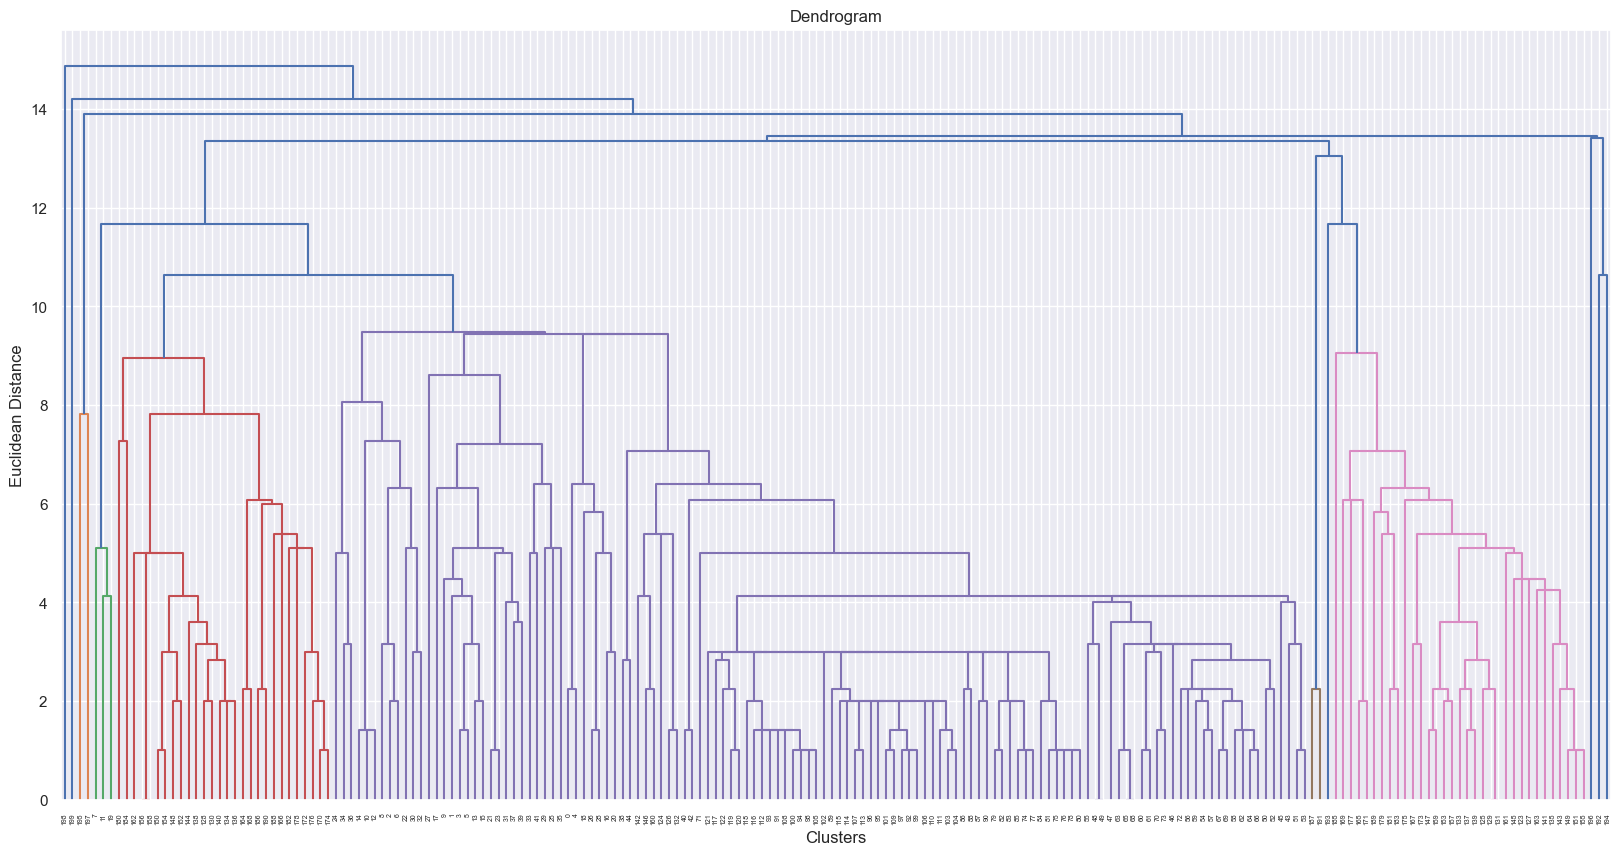

In [16]:
plt.figure(figsize = (20,10))
sch.dendrogram(sch.linkage(data,method = 'single'))
plt.title('Dendrogram')
plt.xlabel('Clusters')
plt.ylabel('Euclidean Distance')
plt.show()

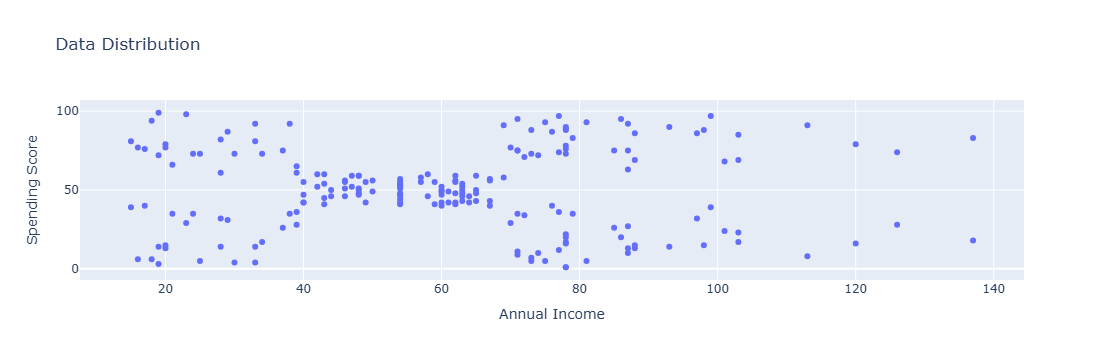

In [17]:
fig = px.scatter(x=data[:,0],y=data[:,1],title = 'Data Distribution')
fig.update_layout(
    xaxis_title = 'Annual Income',
    yaxis_title = 'Spending Score'
)
iplot(fig)

#### Applying the (Elbow/knee) and Silhouette score Methods

## Silhouette Score

The Silhouette Score measures how well data points fit within their assigned clusters. It compares the distance between points in the same cluster and those in the nearest other cluster. The score ranges from **-1 to 1**:
- **1** → Well-separated clusters  
- **0** → Overlapping clusters  
- **Negative** → Poor clustering  

Higher values indicate better clustering quality.


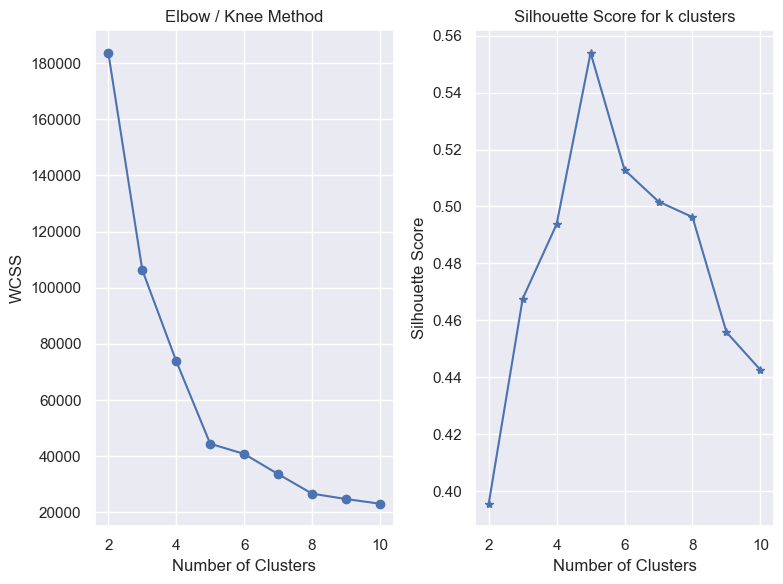

In [20]:
WCSS = []
sil_score = []
for i in range(2,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    labels = kmeans.fit_predict(data)
    sil_avg = silhouette_score(data,labels)
    WCSS.append(kmeans.inertia_)
    sil_score.append(sil_avg)


plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.plot(range(2,11),WCSS,marker='o')
plt.title('Elbow / Knee Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.subplot(1,2,2)
plt.plot(range(2,11),sil_score,marker='*')
plt.title('Silhouette Score for k clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()                     

### From Elbow and Silhouette Score Methods we decide #of clusters = 5 

In [22]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(data)

KMeans(n_clusters=5, random_state=42)

In [23]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [24]:
kmeans.inertia_

44448.45544793371

In [25]:
df['Clusters(KMeans)'] = kmeans.predict(data)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters(KMeans)
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4


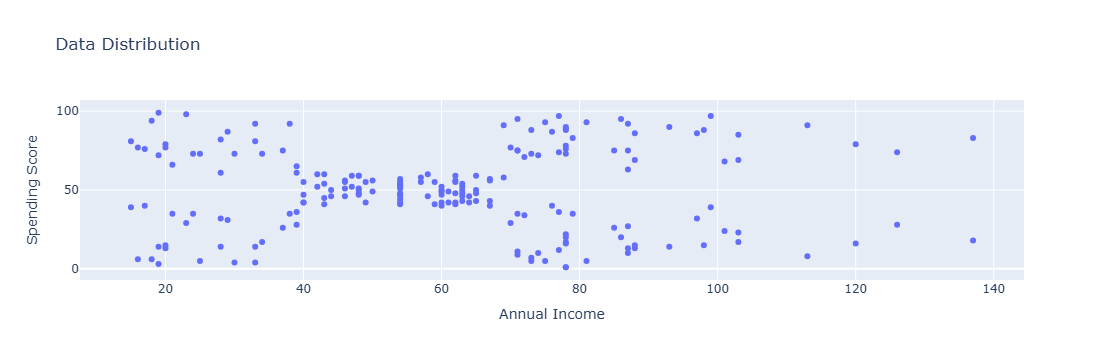

In [26]:
px.scatter(x=data[:,0],y=data[:,1],title = 'Data Distribution',color=df['Clusters(KMeans)'])
fig.update_layout(
    xaxis_title = 'Annual Income',
    yaxis_title = 'Spending Score'
)


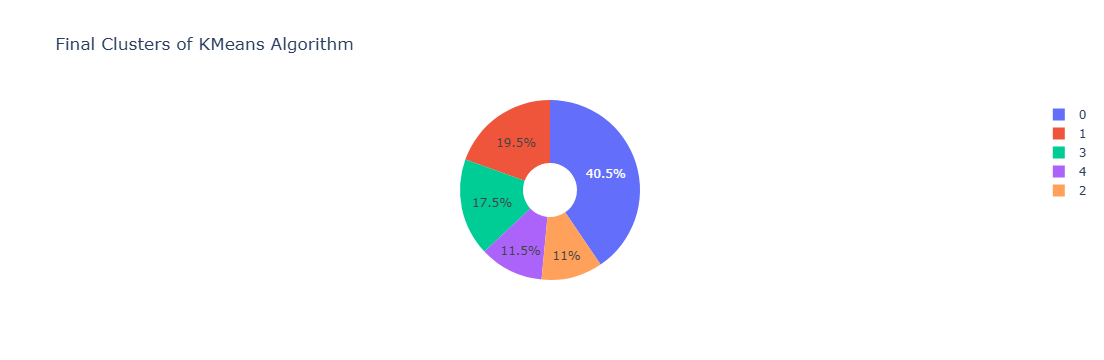

In [27]:
px.pie(df,names='Clusters(KMeans)',title='Final Clusters of KMeans Algorithm',hole=.30,opacity=1)


<div style="
    background-color: #ffecb3;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #333;
">
    Building the Hierarchical Model
</div>


In [29]:
hc = AgglomerativeClustering()

In [30]:
hc.fit(data)

AgglomerativeClustering()

In [31]:
hc.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [32]:
hc.get_params()

{'compute_distances': False,
 'compute_full_tree': 'auto',
 'connectivity': None,
 'distance_threshold': None,
 'linkage': 'ward',
 'memory': None,
 'metric': 'euclidean',
 'n_clusters': 2}

In [33]:
df['Clusters(Hierarchical)'] = hc.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters(KMeans),Clusters(Hierarchical)
CustomerID,,,,,,
1,Male,19,15,39,4,1
2,Male,21,15,81,2,1
3,Female,20,16,6,4,1
4,Female,23,16,77,2,1
5,Female,31,17,40,4,1


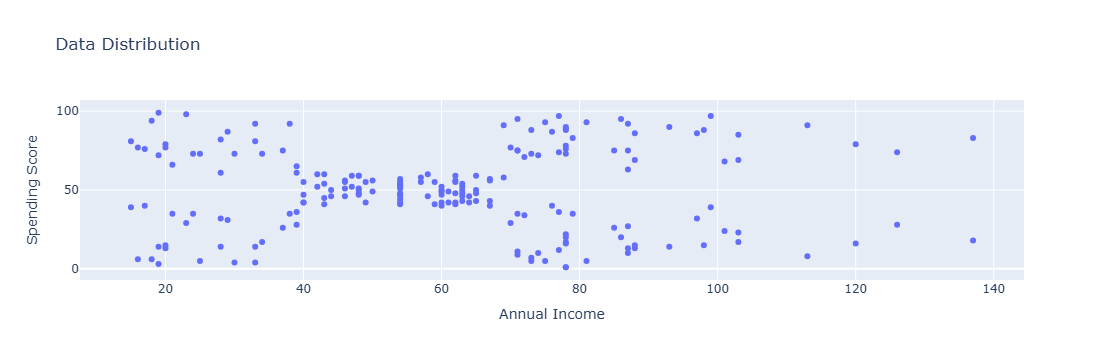

In [34]:
px.scatter(x=data[:,0],y=data[:,1],title = 'Data Distribution',color=df['Clusters(Hierarchical)'])
fig.update_layout(
    xaxis_title = 'Annual Income',
    yaxis_title = 'Spending Score'
)


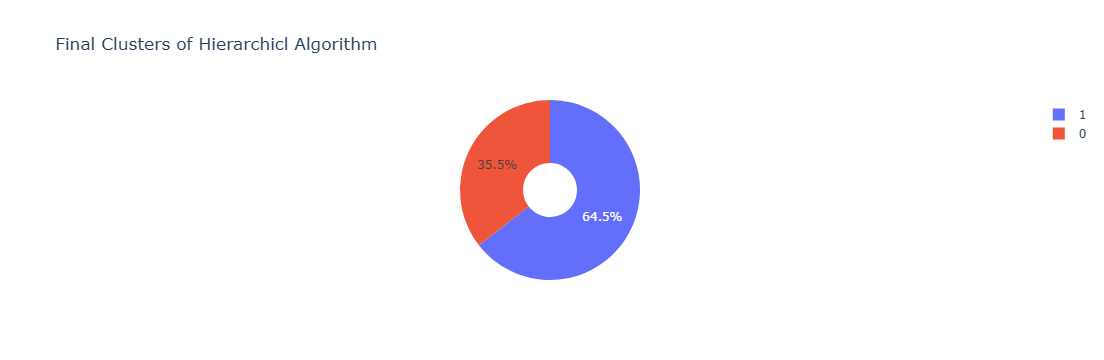

In [35]:
px.pie(df,names='Clusters(Hierarchical)',title='Final Clusters of Hierarchicl Algorithm',hole=.30,opacity=1)

<div style="
    background-color: #D4AF37;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #220;
">
    Comparing between two algorithms
</div>

## **Clustering Results**
| Algorithm  | Number of Clusters |
|------------|-------------------|
| **K-Means**  | 5  | 
| **Hierarchical** | 2  |

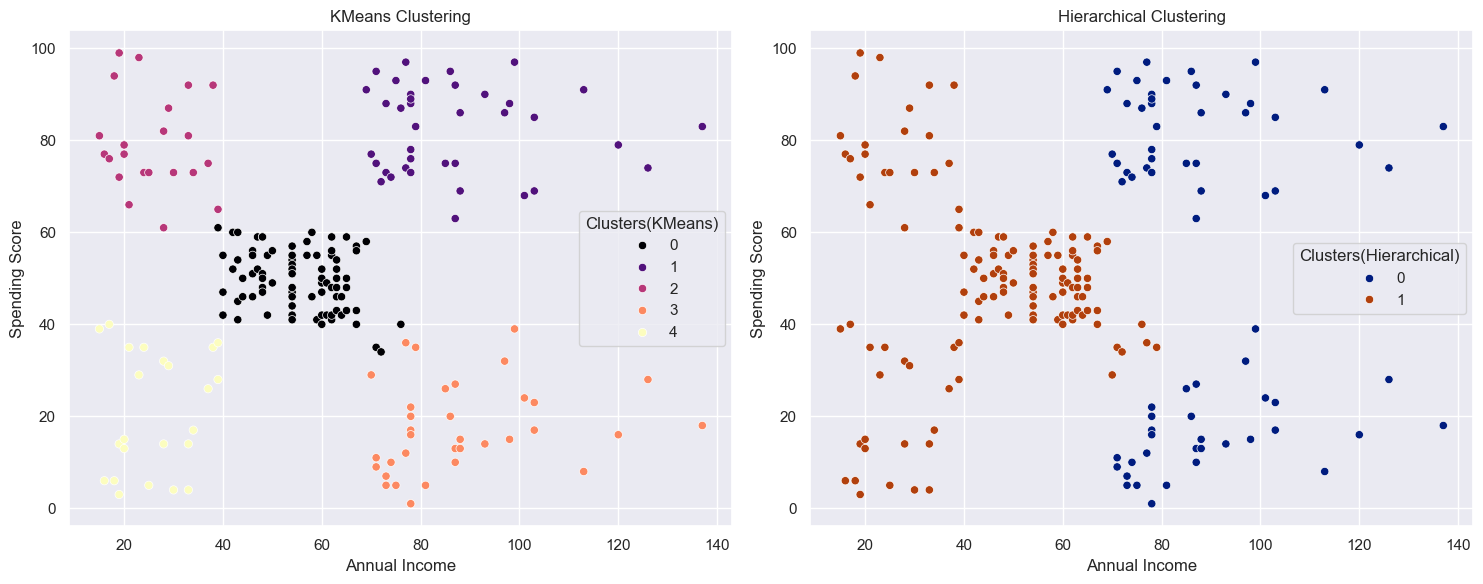

In [38]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.scatterplot(df,x=data[:,0],y=data[:,1],hue='Clusters(KMeans)',palette='magma')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.subplot(1,2,2)
sns.scatterplot(df,x=data[:,0],y=data[:,1],hue='Clusters(Hierarchical)',palette='dark')
plt.title('Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

plt.tight_layout()
plt.show()

<div style="
    background-color: #D4AF37;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #220;
">
    Thank You <3
</div>